# Project 8 -  Star Wars Survey

The dataset that we will analyze can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). It is based on a survey that implied Star Wars fans, using the online tool SuveryMonkey. The purpose is to find out if the original movies are ranked higher overall and enjoy more popularity among the fans of the Star Wars series compared to the more recent movies. <br> <br>
It is important to note that for some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column, so before analyzing it the dataset needs some cleaning.

![Image](https://images.unsplash.com/photo-1601814933824-fd0b574dd592?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2224&q=80)
_Photo by Jonathan Cooper on UnSplash_

## Initial Exploration of the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
star_wars=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 8/star_wars.csv")

The data has several columns, including the following:

Column name | Description  
:-|:-
RespondentID|An anonymized ID for the respondent (person taking the survey)
Gender |  the respondent's gender
Age | the respondent's age
Household Income | the respondent's income
Education |  the respondent's education level
Location (Census Region) | the respondent's location
Have you seen any of the 6 films in the Star Wars franchise? | a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise?| a Yes or No response

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

The columns "__Have you seen any of the 6 films in the Star Wars franchise?"__ and __"Do you consider yourself to be a fan of the Star Wars film franchise?"__ represent __Yes/No__ questions. To make the data easier to analyze later, we will convert each column to a Boolean with only the values True, False, and NaN using pandas.Series.map() method.

In [5]:
def label(element):
    if element=='Yes':
        return True
    elif element=='No':
        return False
        
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(label)

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(label)

In [7]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [21]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns

Columns 4-9 represent a single checkbox question. The respondent checked off a series of boxes in response to the question, "Which of the following Star Wars films have you seen? Please select all that apply.". <br>
For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. However, we will assume that they didn't see the movie.<br>
We'll also convert each of these columns to a Boolean using the map() method, then rename the column something easier to understand. 

In [8]:
def seen(element):
    if element=="Star Wars: Episode I  The Phantom Menace": 
            return True 
    elif element==np.nan:
            return False
    elif element=="Star Wars: Episode II  Attack of the Clones": 
            return True
    elif element=="Star Wars: Episode III  Revenge of the Sith": 
            return True
    elif element=="Star Wars: Episode IV  A New Hope": 
            return True
    elif element=="Star Wars: Episode V The Empire Strikes Back": 
            return True
    elif element=="Star Wars: Episode VI Return of the Jedi":
            return True


In [9]:
star_wars.rename({"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", "Unnamed: 4":"seen_2", "Unnamed: 5":"seen_3", "Unnamed: 6":"seen_4", "Unnamed: 7":"seen_5", "Unnamed: 8":"seen_6"}, axis=1, inplace=True)

In [10]:
star_wars['seen_1']=star_wars['seen_1'].map(seen)
star_wars['seen_2']=star_wars['seen_2'].map(seen)
star_wars['seen_3']=star_wars['seen_3'].map(seen)
star_wars['seen_4']=star_wars['seen_4'].map(seen)
star_wars['seen_5']=star_wars['seen_5'].map(seen)
star_wars['seen_6']=star_wars['seen_6'].map(seen)

## Cleaning the Ranking Columns

The next six columns ask the person that completed the survey to rank the Star Wars movies in order from least to most favorite (1 being the most favorite, and 6 being the least favorite).  We'll convert each column to a numeric type, then rename the columns to somehting more intuitive.

In [11]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [12]:
star_wars.rename({"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1", "Unnamed: 10":"ranking_2", "Unnamed: 11":"ranking_3", "Unnamed: 12":"ranking_4", "Unnamed: 13":"ranking_5", "Unnamed: 14":"ranking_6"}, axis=1, inplace=True)

## Finding the Highest-Ranked Movie

In [13]:
%matplotlib inline

In order to find the highest-ranked movie, we will take the mean of each ranking columns using the pandas.DataFrame.mean() method on DataFrames. Then we will plot the results using a bar chart.

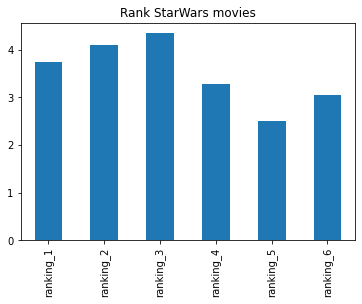

In [22]:
star_wars[star_wars.columns[9:15]].mean().plot.bar()
plt.title("Rank StarWars movies")
plt.show()

From the bar chart above it looks like the "original" movies are rated much more highly than the newer ones.

## Finding the Most Viewed Movie

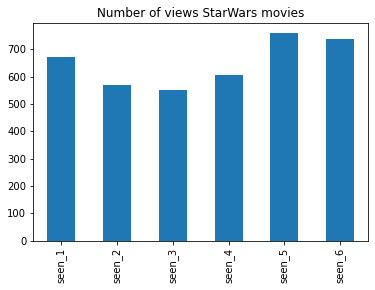

In [23]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()
plt.title("Number of views StarWars movies")
plt.show()

It appears that more respondents saw the original movies than the newer movies. This reinforces what we saw in the rankings analysis.

## Exploring the Data by Binary Segments

We will split the dataframe into two groups based on the binary column "Gender" by creating two subsets of that column. Then we will compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [16]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

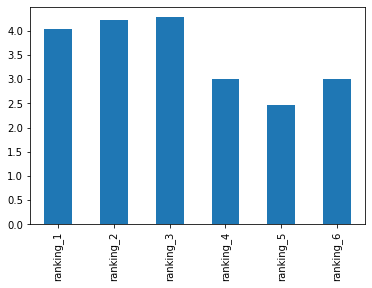

In [17]:
males[males.columns[9:15]].mean().plot.bar()
plt.title("Rank StarWars movies - men")
plt.show()

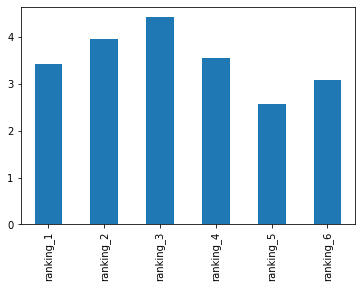

In [18]:
females[females.columns[9:15]].mean().plot.bar()
plt.title("Rank StarWars movies - women")
plt.show()

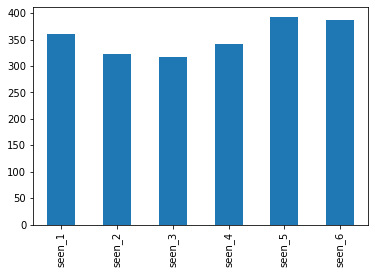

In [19]:
males[males.columns[3:9]].sum().plot.bar()
plt.title("Number of views StarWars movies - men")
plt.show()

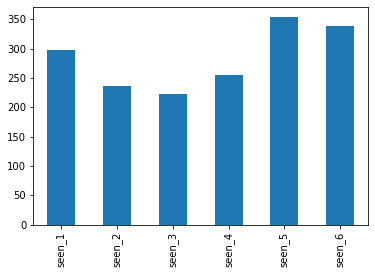

In [20]:
females[females.columns[3:9]].sum().plot.bar()
plt.title("Number of views StarWars movies - women")
plt.show()

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.